## Spam Classifier Mini_Projects_4_

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\spammm.csv',encoding ='iso-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

### 1.Data cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop unwanted clg 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [8]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
# rename clg name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# coverting target clg into vectors 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['target']=enc.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
# Remove duplictes value 
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

### 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# data balencing cahking
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

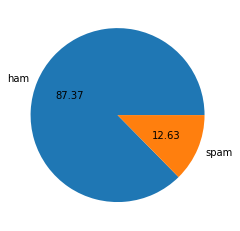

In [19]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
# data is inbalence

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
#charectores
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# Santence
df['num_sentences'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [28]:
# words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [30]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.948733,18.456955
std,58.236293,1.364735,13.328581
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [31]:
# ham
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.800266,17.123118
std,56.358207,1.279694,13.496676
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [32]:
#spam
df[df['target']==1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.975498,27.681470
std,30.137753,1.487993,7.010919
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,8.000000,46.000000


### 3.Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [33]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [34]:
df['text'][3]

'U dun say so early hor... U c already then say...'

In [81]:
# for steming labrary
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing , eaten , played')

'dancing , eaten , play'

In [82]:
# punctuation labrary to remove punctuations in santeces
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
from nltk.corpus import stopwords
stopworld = stopwords.words('english')

In [105]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [106]:
transform_text("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [107]:
# above coad apply on our whole data
df['transformed_text'] = df['text'].apply(transform_text)

In [108]:
df.sample(10)

,target,text,num_characters,num_sentences,num_words,transformed_text
4017,0,"\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\""""",48,1,9,onlyfound afew day
1497,0,I'm putting it on now. It should be ready for ...,60,2,19,put readi lt time gt
3804,0,Dude while were makin those weirdy brownies my...,88,2,17,dude makin weirdi browni sister made awesom co...
3638,0,Wat's da model num of ur phone?,31,1,9,wat da model num ur phone
4308,0,He dint tell anything. He is angry on me that ...,66,2,17,dint tell anyth angri told abi
1793,0,You bad girl. I can still remember them,39,2,9,bad girl still rememb
950,0,"Awesome, lemme know whenever you're around",42,1,9,awesom lem know whenev around
343,0,Am not interested to do like that.,34,1,8,interest like
3434,0,\Hi darlin i cantdo anythingtomorrow as mypare...,105,3,21,darlin cantdo anythingtomorrow mypar aretak ou...
4671,1,Customer service announcement. We recently tri...,152,3,27,custom servic announc recent tri make deliveri...


In [109]:
#

In [110]:
# wordCloud --> it will show the most important word in big size photo :

In [111]:
!pip install wordcloud 

In [112]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=20,background_color='white')

In [113]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

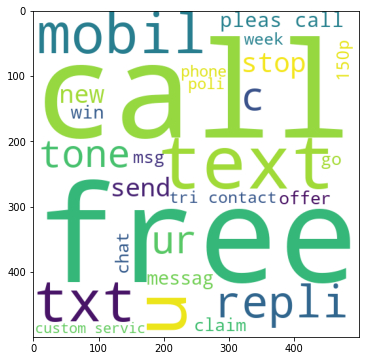

In [114]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [115]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

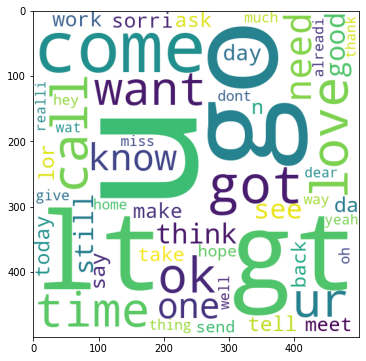

In [116]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [117]:
# text Vectorisation using 
# Bag of words

## 4. Model building

In [118]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [131]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [132]:
#x = tfidf.fit_transform(df['transformed_text']).toarray()
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [133]:
x.shape

(5169, 3000)

In [134]:
y= df['target'].values

In [135]:
y.shape

(5169,)

In [136]:
# train test split :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [137]:
x_train.shape,x_test.shape

((4135, 3000), (1034, 3000))

In [138]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [139]:
# GaussianNB
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print('Accuracy_score:',accuracy_score(y_test,y_pred1),'\n')
print('Confusion_matrix:',confusion_matrix(y_test,y_pred1),'\n')
print('Precision:',precision_score(y_test,y_pred1))

Accuracy_score: 0.8733075435203095 

Confusion_matrix: [[791 105]
 [ 26 112]] 

Precision: 0.5161290322580645


In [140]:
#MultinomialNB
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('Accuracy_score:',accuracy_score(y_test,y_pred2),'\n')
print('Confusion_matrix:',confusion_matrix(y_test,y_pred2),'\n')
print('Precision:',precision_score(y_test,y_pred2))

Accuracy_score: 0.9729206963249516 

Confusion_matrix: [[896   0]
 [ 28 110]] 

Precision: 1.0


In [141]:
#BernoulliNB
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print('Accuracy_score:',accuracy_score(y_test,y_pred3),'\n')
print('Confusion_matrix:',confusion_matrix(y_test,y_pred3),'\n')
print('Precision:',precision_score(y_test,y_pred3))

Accuracy_score: 0.9835589941972921 

Confusion_matrix: [[895   1]
 [ 16 122]] 

Precision: 0.991869918699187


In [ ]:
# tfidf -->MNB good

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [147]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [148]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [149]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [151]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.97678916827853, 0.975)

In [153]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9264990328820116
Precision -  0.81
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9541284403669725
For  BgC
Accuracy -  0.9526112185686654
Precision -  0.856
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9393939393939394
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9473684210526315


In [155]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [156]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
5,RF,0.972921,0.982456
8,ETC,0.978723,0.975410
0,SVC,0.976789,0.975000
4,LR,0.956480,0.969697
6,AdaBoost,0.962282,0.954128
10,xgb,0.965184,0.947368
9,GBDT,0.950677,0.939394
7,BgC,0.952611,0.856000


In [157]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [158]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,RF,Accuracy,0.972921
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.976789
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.962282
7,xgb,Accuracy,0.965184
8,GBDT,Accuracy,0.950677
9,BgC,Accuracy,0.952611


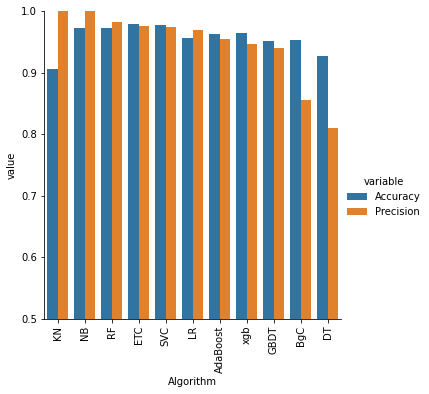

In [160]:
import seaborn as sns
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [161]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [164]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision', ascending=False)

KeyError: 'Precision'